In this notebook we will be building a model for the prediction App rating based on the various features given in the dataset. <br>Source of the dataset is [Kaggle](https://www.kaggle.com/datasets/lava18/google-play-store-apps).

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from  sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/GPlayStore/googleplaystore.csv')

# **Data Exploration and Cleaning**

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The dataset has 10,841 records and 13 columns, only rating is float while others are of object types

#**Checking for the NaN values**

In [7]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As most of the NaNs are in the Rating and the numbers are significant so we will impute it with median and will delete other NaNs.

# **1) App : Duplicates**

In [8]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

Here there are many duplicate apps. So we will drop them as they are just repating

In [9]:
df[df.duplicated(subset='App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


So 1181 duplicated apps apparently will be dropped.

In [10]:
df.drop_duplicates(subset='App', inplace=True, ignore_index=True)

# **2) Category : All are object**
There are different categories of apps and we have to deal with each.Later we will do label encoding for this.

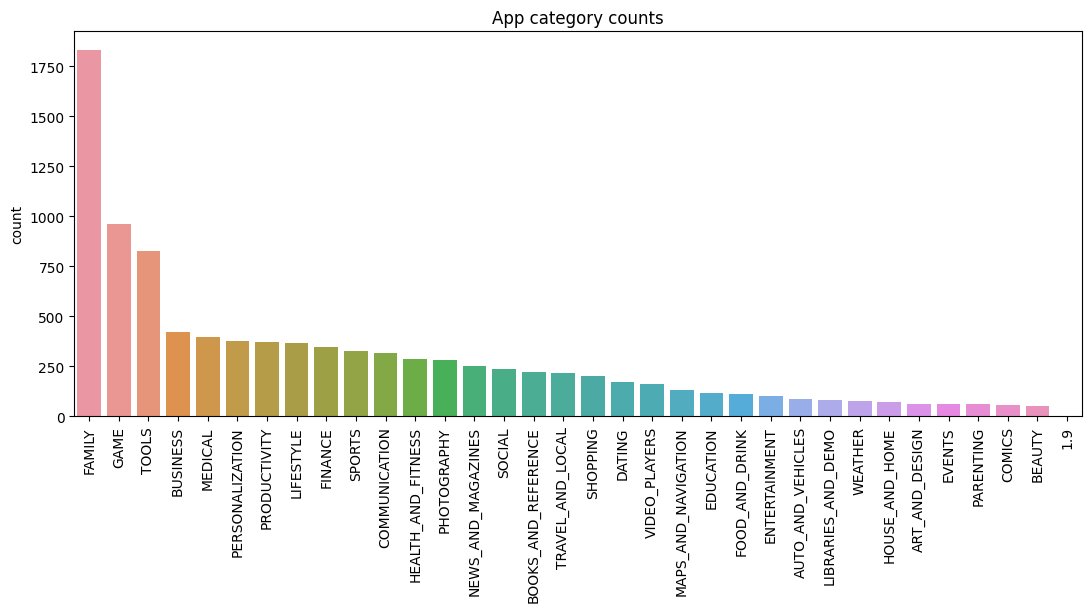

In [11]:
plt.subplots(figsize=(13,5))
sns.countplot(x='Category', data=df, order = df['Category'].value_counts().index)
plt.xticks(rotation=90);
plt.xlabel('')
plt.title('App category counts');

### Clearly top three apps category are Family, Game and Tools

# **3) Rating : NaN values**

In [12]:
df.isnull().sum()


App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

As there are 1463 NaN in rating we will fill it with median value and for the rest of NaN we will drop it.

In [13]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [14]:
# Removing other NaN

df.dropna(inplace = True)

In [15]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9648 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9648 non-null   object 
 1   Category        9648 non-null   object 
 2   Rating          9648 non-null   float64
 3   Reviews         9648 non-null   object 
 4   Size            9648 non-null   object 
 5   Installs        9648 non-null   object 
 6   Type            9648 non-null   object 
 7   Price           9648 non-null   object 
 8   Content Rating  9648 non-null   object 
 9   Genres          9648 non-null   object 
 10  Last Updated    9648 non-null   object 
 11  Current Ver     9648 non-null   object 
 12  Android Ver     9648 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


# **4) Reviews : Object to number**
Reviews is also an object so we will convert it to number.

In [17]:
# convert reviews to numeric
df['Reviews'] = df['Reviews'].astype(int)

# **5) SIze : Object to number**
Eliminating M and K from the data and replacing it with 1000000 & 1000

In [18]:
#Scaling and Cleaning Size
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

df["Size"] = df["Size"].map(change_size)

#filling Size which have NaN with ffill
# The missing value is filled based on the corresponding value in the previous row.

df.Size.fillna(method = 'ffill', inplace = True)


# Normalization
Converting size to single MB scale

In [19]:
# normalisation
mb=1000000
def normalise(data):
  return data/mb

df['Size'] = df['Size'].map(normalise)
df['Size'].describe()

count    9648.000000
mean       20.494895
std        21.682523
min         0.008500
25%         4.700000
50%        12.000000
75%        28.000000
max       100.000000
Name: Size, dtype: float64

# **6) Installs : Object to number**

In [20]:
#Installs cleaning : Removing + sign

df['Installs'] = df['Installs'].apply(lambda x : x.strip('+').replace(',', ''))
df['Installs'] = df['Installs'].astype(int)

In [21]:
df['Installs'].describe()

count    9.648000e+03
mean     7.786211e+06
std      5.378830e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

# Normalisation with log(x+1)
As the number is very large adn to improve the ML algorithm prediction performance, we will log-transform the column 'Installs', in order to make it more 'Normal'. In particular, we should transform it with log(x+1) transform, since there are apps with 0 installs.

In [22]:
df['Installs']=np.log(df['Installs'] + 1)

In [23]:
df['Installs'].describe()

count    9648.000000
mean       10.701810
std         4.373232
min         0.000000
25%         6.908755
50%        11.512935
75%        13.815512
max        20.723266
Name: Installs, dtype: float64

# **7) Type : Encoding with 0 and 1**

In [24]:
#Type Encoding
def type_cat(types):
    if types == 'Free':
        return 0
    else:
        return 1

df['Type'] = df['Type'].map(type_cat)


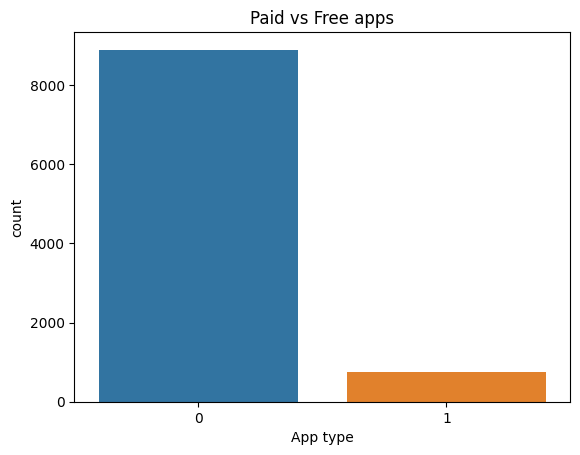

In [25]:
sns.countplot(x='Type', data=df)
plt.title('Paid vs Free apps')
plt.xlabel('App type')
plt.show()

# **8) Price : Object to number**

In [26]:
# Price cleaning : Removing $ sign
df['Price'] = df['Price'].apply(lambda x : float(x.strip('$')))


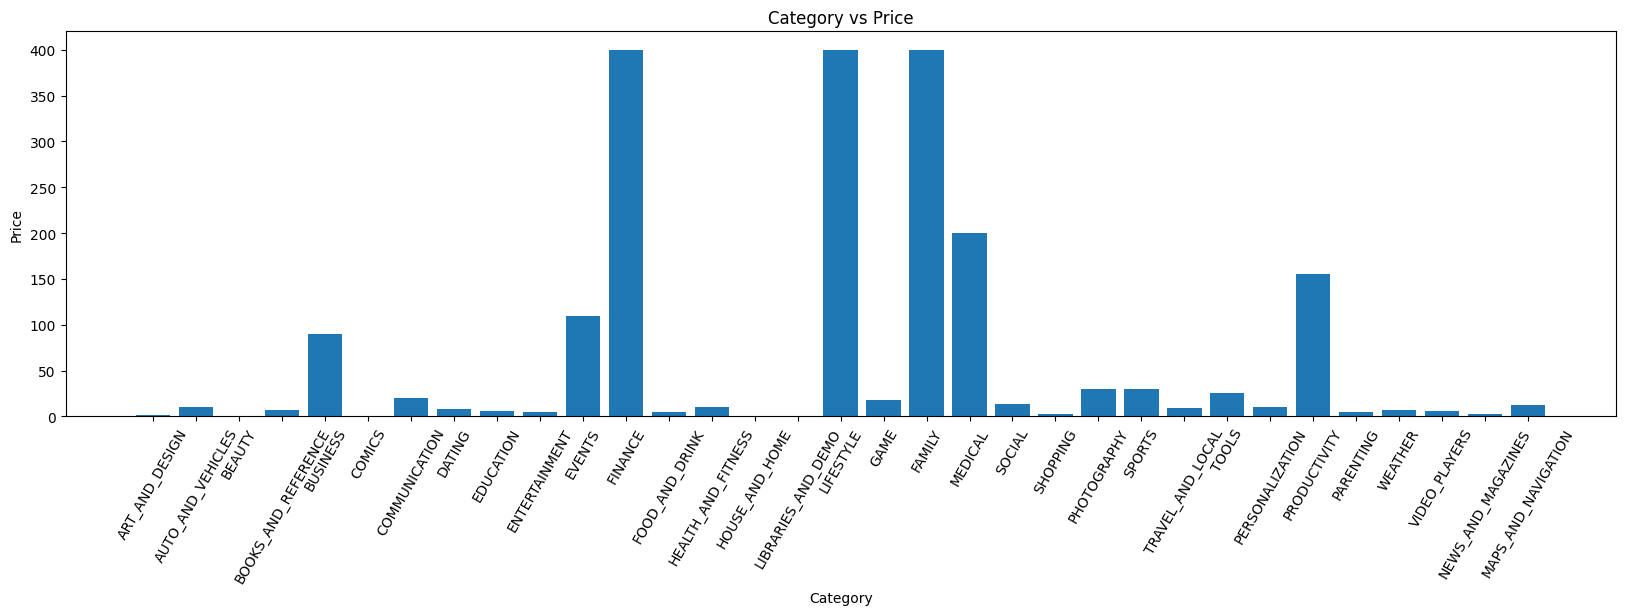

In [27]:
plt.figure(figsize=(20,5))
plt.bar(df['Category'], df['Price'])
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=60)
plt.title('Category vs Price')
plt.show()


In [28]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,9.210440,0,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,13.122365,0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,15.424949,0,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,17.727534,0,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,11.512935,0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Categorical Data Encoding**
Now we will label encode the categorical data

# **8) Content Rating**

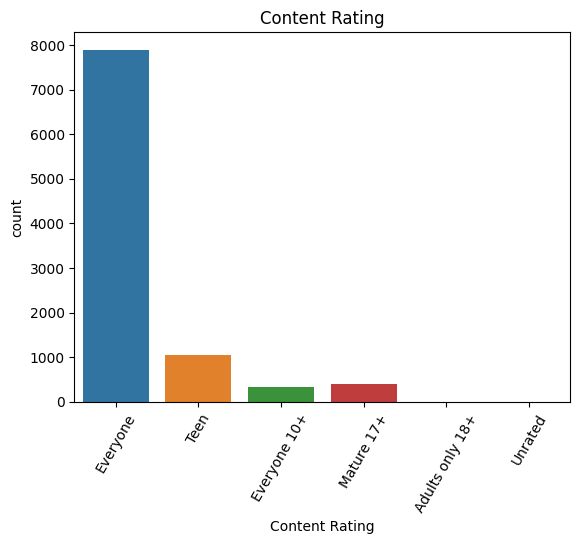

In [29]:
sns.countplot(x='Content Rating', data=df)
plt.title('Content Rating')
plt.xticks(rotation=60)
plt.show()

# **9) Genres**

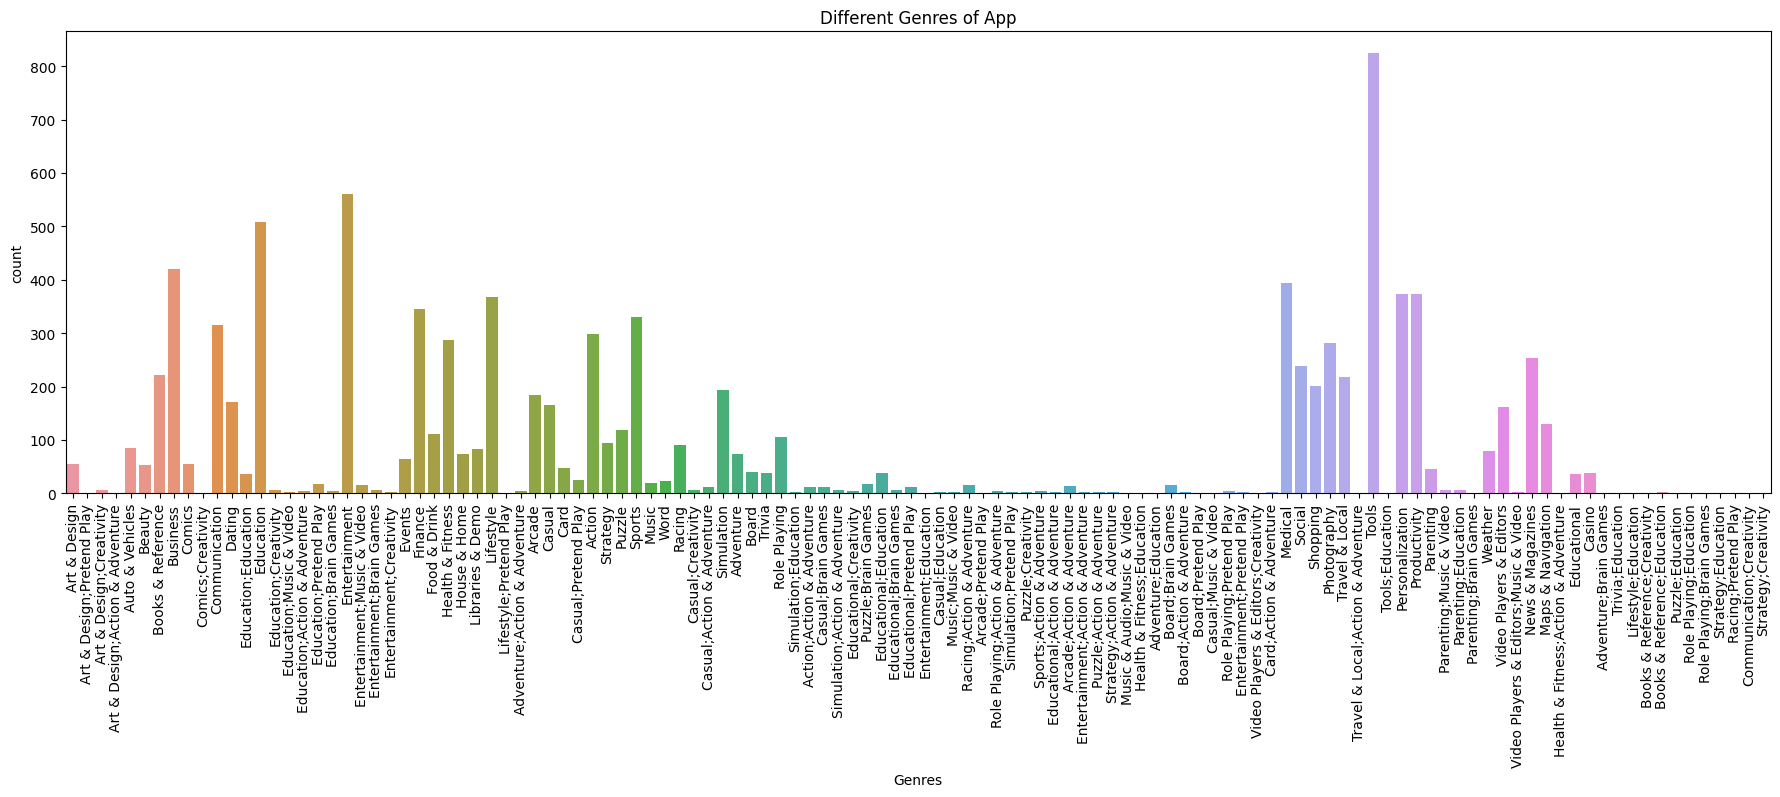

In [30]:
plt.figure(figsize=(22,6))
sns.countplot(x='Genres', data=df)
plt.title('Different Genres of App')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.show()

Genres also has wide range of values we also to label encoding for this

# **Category**

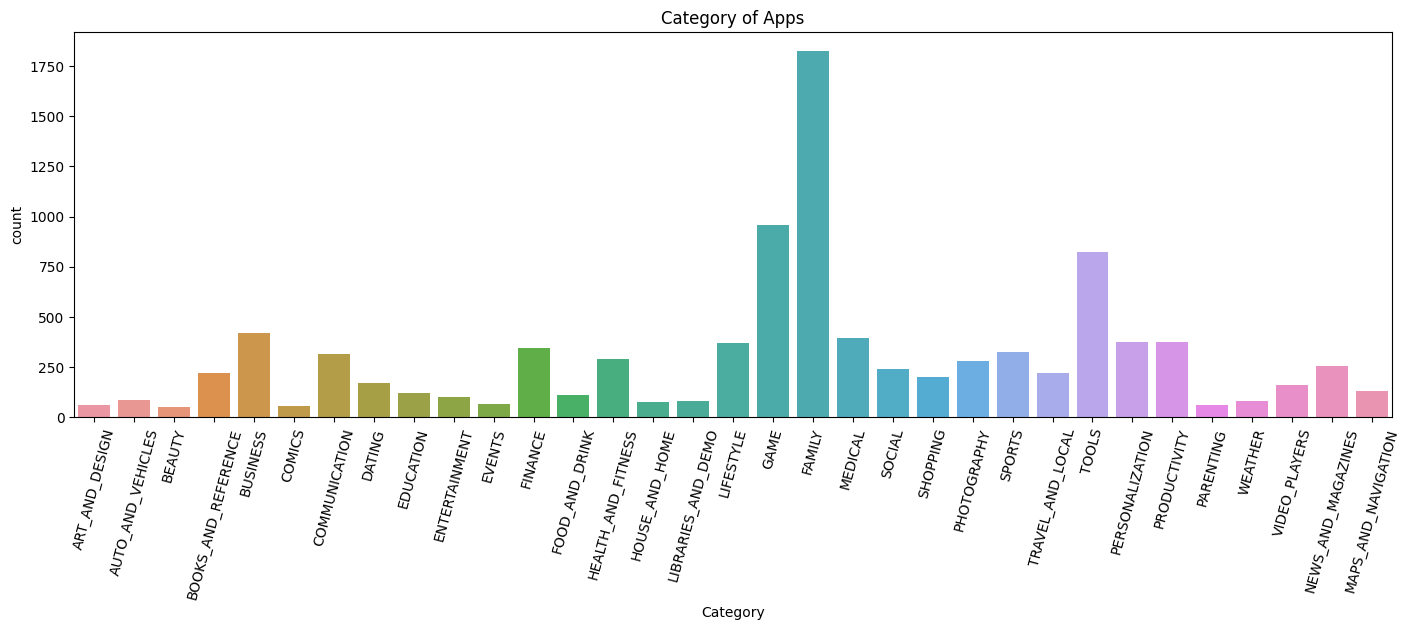

In [31]:
plt.figure(figsize=(17,5))
sns.countplot(x='Category', data=df)
plt.title('Category of Apps')
plt.xlabel('Category')
plt.xticks(rotation=75)
plt.show()

# **Label Encoding**
Now for category, Content Rating and Genres, we will encode them by label encoder, since One Hot Hncoding will create too many columns.

In [32]:
le = LabelEncoder()
catCols =  ['Category','Content Rating','Genres']
for cols in catCols:
    df[cols] = le.fit_transform(df[cols])

In [33]:
df.describe()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,9648.000000,9648.000000,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,16.761816,4.192465,2.168369e+05,20.494895,10.701810,0.078047,1.100193,1.437396,63.773839
std,8.399471,0.496552,1.832349e+06,21.682523,4.373232,0.268260,16.861727,0.987440,32.351698
min,0.000000,1.000000,0.000000e+00,0.008500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,4.000000,2.500000e+01,4.700000,6.908755,0.000000,0.000000,1.000000,38.000000
50%,14.000000,4.300000,9.690000e+02,12.000000,11.512935,0.000000,0.000000,1.000000,66.000000
75%,25.000000,4.500000,2.944925e+04,28.000000,13.815512,0.000000,0.000000,1.000000,95.000000
max,32.000000,5.000000,7.815831e+07,100.000000,20.723266,1.000000,400.000000,5.000000,117.000000


<ipython-input-34-25b26fb3a495>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='Reds')


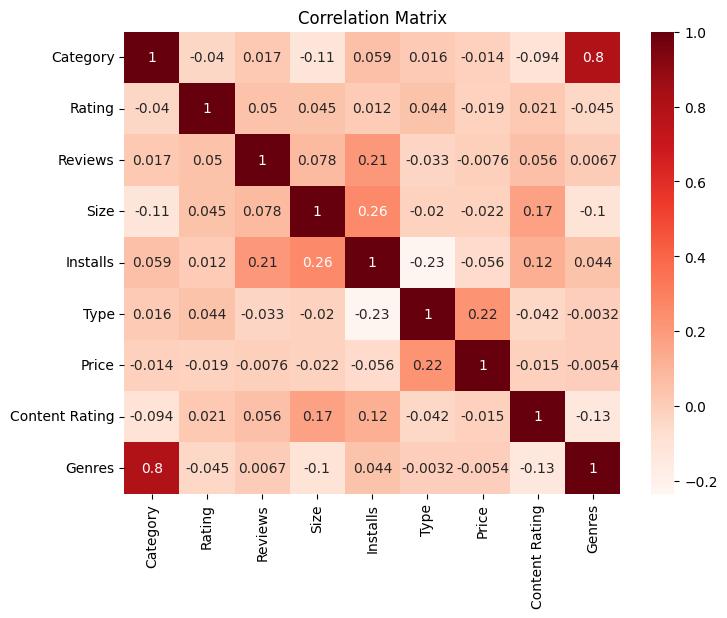

In [34]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

In this matrix we can see that category and genres are very highly correlated so we will drop genres

# **Selecting columns & Splitting our data into train and test sets**




In [35]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19.0,9.21044,0,0.0,1,9,"January 7, 2018",1.0.0,4.0.3 and up


In [36]:
features = ['Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating']

X = df[features]
Y = df['Rating']

## Splitting data set into 25% test data and 75% training data

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 10)

In [38]:
X

,Category,Reviews,Size,Installs,Type,Price,Content Rating
0,0,159,19.0,9.210440,0,0.0,1
1,0,967,14.0,13.122365,0,0.0,1
2,0,87510,8.7,15.424949,0,0.0,1
3,0,215644,25.0,17.727534,0,0.0,4
4,0,967,2.8,11.512935,0,0.0,1
...,...,...,...,...,...,...,...
9655,11,38,53.0,8.517393,0,0.0,1
9656,11,4,3.6,4.615121,0,0.0,1
9657,20,3,9.5,6.908755,0,0.0,1
9658,3,114,9.5,6.908755,0,0.0,3


# **Linear Regression**

In [39]:
model_lr = LinearRegression()
model_lr.fit(X_train,Y_train)
Y_pred_lr = model_lr.predict(X_test)


## **Coefficients**

In [40]:
coefficients = model_lr.coef_
columns = X_train.columns.tolist()
coefficients_df = pd.DataFrame({'Feature': columns, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values('Coefficient', ascending=False)

coefficients_df

,Feature,Coefficient
4,Type,1.063503e-01
6,Content Rating,5.395456e-03
3,Installs,1.797397e-03
2,Size,6.907774e-04
1,Reviews,1.107895e-08
5,Price,-9.059227e-04
0,Category,-2.690098e-03


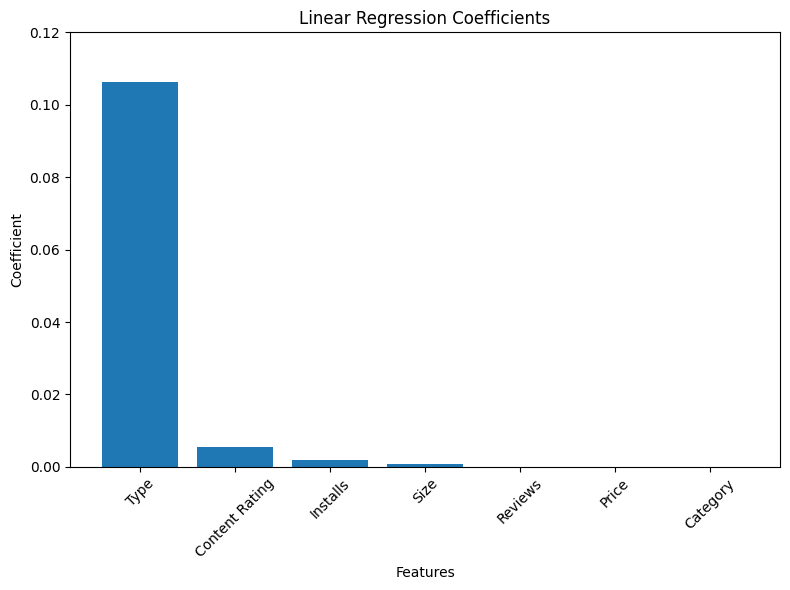

In [41]:
plt.figure(figsize=(8, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=45)
plt.ylim(0,0.12)
plt.tight_layout()
plt.show()

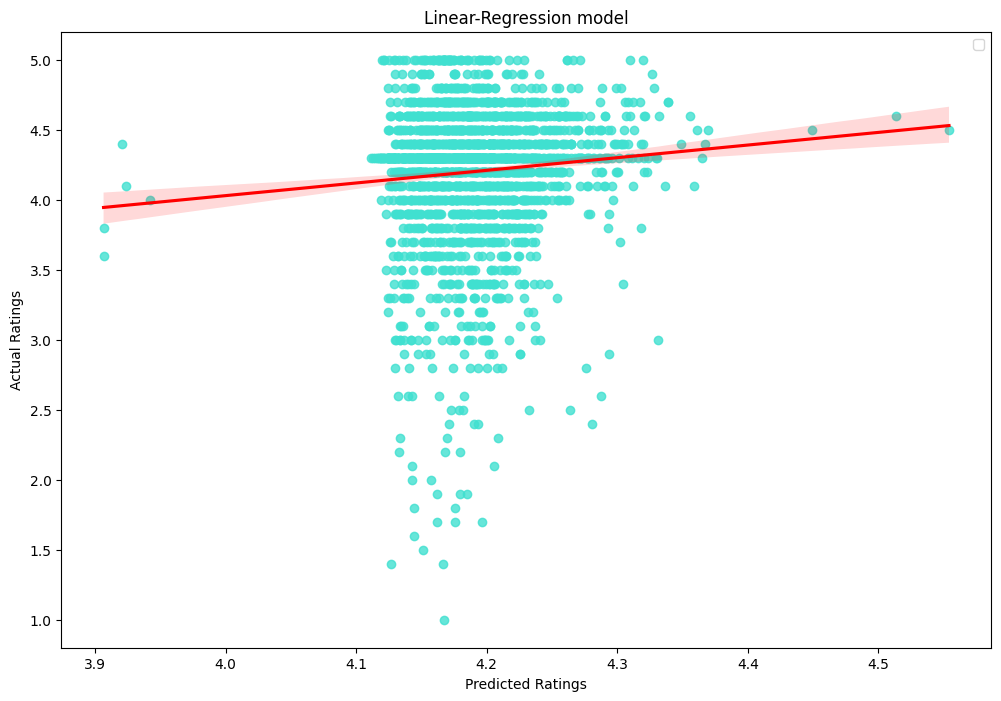

In [42]:
plt.figure(figsize=(12,8))
sns.regplot(x=Y_pred_lr,y=Y_test,color='r',scatter_kws={"color": "turquoise"}, line_kws={"color": "red"})
plt.legend()
plt.title('Linear-Regression model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

As we can see how the actual ratings and the predicted ratings related. Most of the predicted rating fall in between [4.1,4.4] while actual ratings varies thoroughly. Though the model is not fitting that good but one can infer from this that the rating of app does not follow any strict linear relationship with the attributes. So now we wil employ random forest that may give better result than this.

# **Errors**

In [43]:
linear_reg_mse = mean_squared_error(Y_test,Y_pred_lr)
linear_reg_mae = mean_absolute_error(Y_test,Y_pred_lr)
linear_reg_rmse =np.sqrt(mean_squared_error(Y_test,Y_pred_lr))

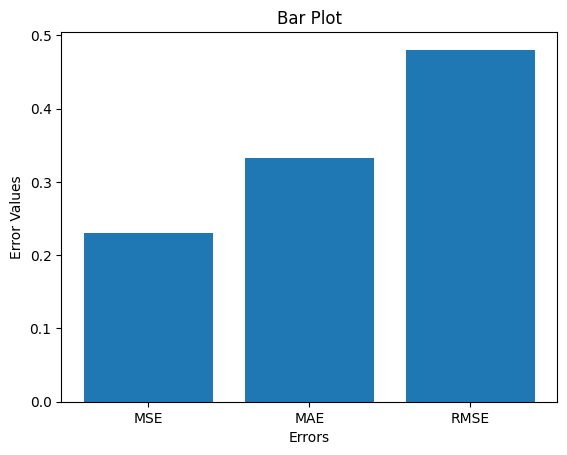

In [44]:
data_points = [linear_reg_mse, linear_reg_mae, linear_reg_rmse]

labels = ['MSE', 'MAE', 'RMSE']

plt.bar(labels, data_points)
plt.xlabel('Errors')
plt.ylabel('Error Values')
plt.title('Bar Plot')

plt.show()


# **Random Forest Regressor**

In [45]:
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)


## **Importances**

In [46]:
importances = rf.feature_importances_
columns = X_train.columns.tolist()
importances_df = pd.DataFrame({'Feature': columns, 'Importances': importances})
importances_df = importances_df.sort_values('Importances', ascending=False)

importances_df

,Feature,Importances
1,Reviews,0.343879
2,Size,0.315781
0,Category,0.170667
3,Installs,0.108437
6,Content Rating,0.028948
5,Price,0.026937
4,Type,0.005350


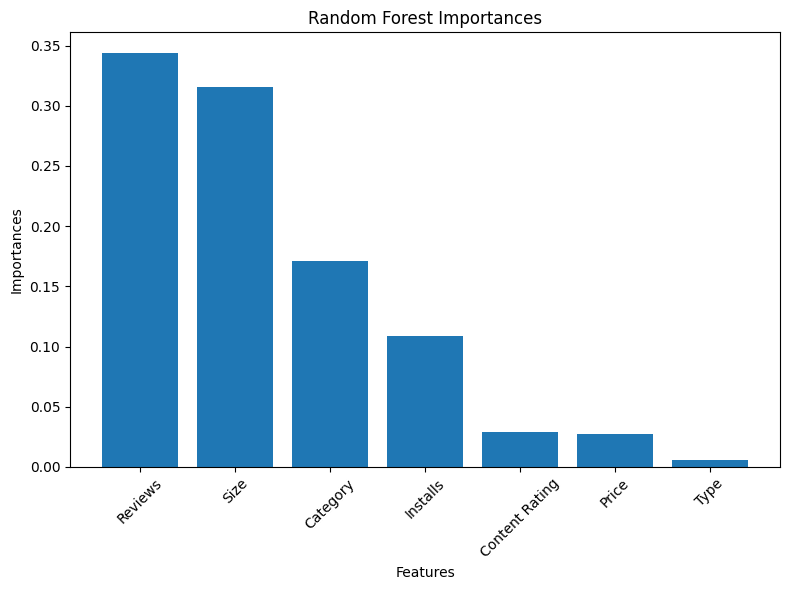

In [47]:
plt.figure(figsize=(8, 6))
plt.bar(importances_df['Feature'], importances_df['Importances'])
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Random Forest Importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

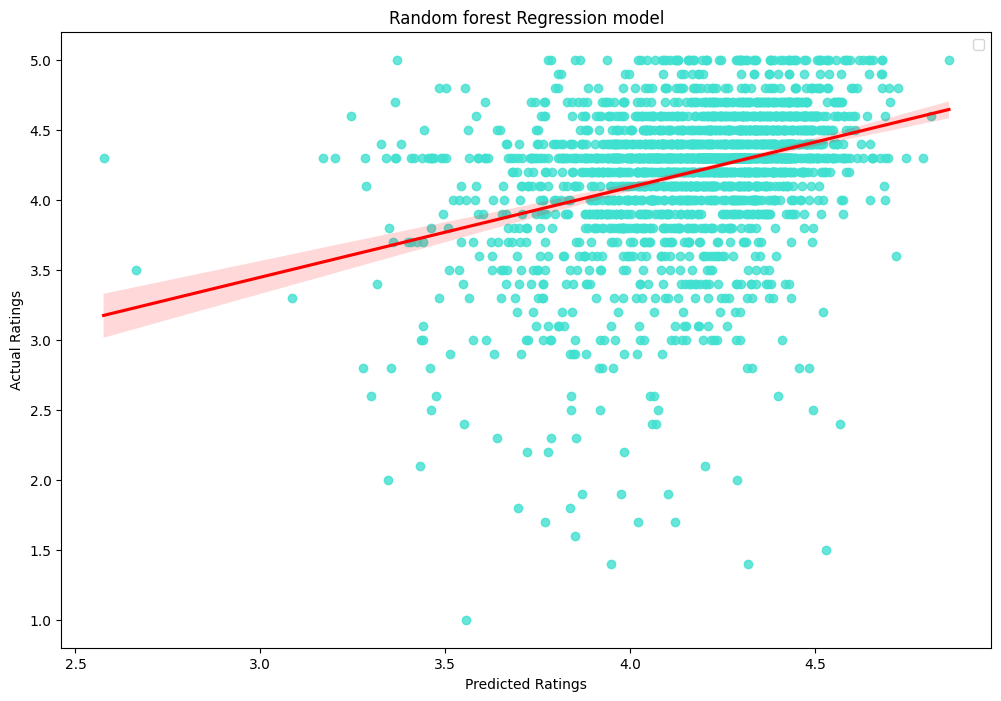

In [48]:
plt.figure(figsize=(12,8))
sns.regplot(x=Y_pred_rf,y=Y_test,color='r',scatter_kws={"color": "turquoise"}, line_kws={"color": "red"})
plt.legend()
plt.title('Random forest Regression model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

Here we can see how the random forest regression approach covers wide range of ratings though not as much as the actual ratings but still it's giving better results and the variablility in the ratings suggest that it has covers different aspects of the attributes that linear regression could not. Overall the result still satisfactory.

# **Errors**

In [49]:
rf_reg_mse = mean_squared_error(Y_test,Y_pred_rf)
rf_reg_mae = mean_absolute_error(Y_test,Y_pred_rf)
rf_reg_rmse = np.sqrt(mean_squared_error(Y_test,Y_pred_rf))

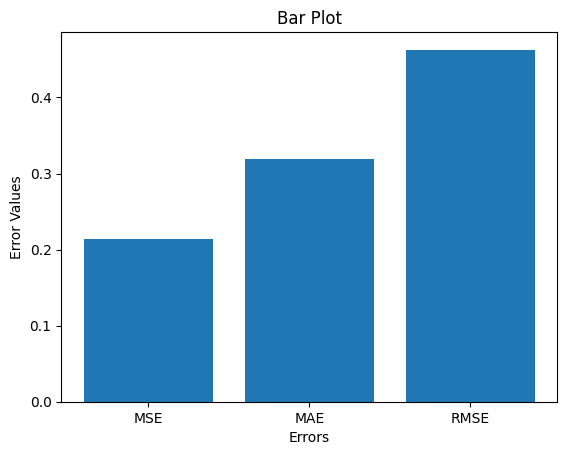

In [50]:
data_points = [rf_reg_mse, rf_reg_mae, rf_reg_rmse]

labels = ['MSE', 'MAE', 'RMSE']

plt.bar(labels, data_points)
plt.xlabel('Errors')
plt.ylabel('Error Values')
plt.title('Bar Plot')

plt.show()


# **Hyper Parameters Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their respective values for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform Grid Search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the testing set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the performance of the best model using mean squared error
mse = mean_squared_error(Y_test, y_pred)
print("Best Model MSE:", mse)
print("Best Hyperparameters:", best_params)


In [ ]:
importances = best_model.feature_importances_
columns = X_train.columns.tolist()
importances_df = pd.DataFrame({'Feature': columns, 'Importances': importances})
importances_df = importances_df.sort_values('Importances', ascending=False)

importances_df

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(importances_df['Feature'], importances_df['Importances'])
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Random Forest Importances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
rf_reg_mse = mean_squared_error(Y_test,y_pred)
rf_reg_mae = mean_absolute_error(Y_test,y_pred)
rf_reg_rmse = np.sqrt(mean_squared_error(Y_test,y_pred))

In [ ]:
data_points = [rf_reg_mse, rf_reg_mae, rf_reg_rmse]

labels = ['MSE', 'MAE', 'RMSE']

plt.bar(labels, data_points)
plt.xlabel('Errors')
plt.ylabel('Error Values')
plt.title('Bar Plot')

plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_pred,y=Y_test,color='r',scatter_kws={"color": "turquoise"}, line_kws={"color": "red"})
plt.legend()
plt.title('Random forest Regression model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

# **Comparison**

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x=y_pred,y=Y_test,color='r',scatter_kws={ "color": "black"}, line_kws={"color": "green"}, marker='.',label='Random Forest')
sns.regplot(x=Y_pred_lr,y=Y_test,color='r',scatter_kws={"color": "orange"}, line_kws={"color": "red"},label='Linear Regression')

plt.legend()
plt.title('Regression model')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MSE': [linear_reg_mse, rf_reg_mse],
    'MAE': [linear_reg_mae, rf_reg_mae],
    'RMSE': [linear_reg_rmse, rf_reg_rmse]
})

print(results)

In [ ]:
models = ['Linear Regression',  'Random Forest']
mse_values = [linear_reg_mse, rf_reg_mse]
mae_values = [linear_reg_mae, rf_reg_mae]
rmse_values = [linear_reg_rmse,  rf_reg_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, label='RMSE')
plt.bar(models, mae_values, label='MAE')
plt.bar(models, mse_values, label='MSE')

plt.xlabel('Models')
plt.ylabel('Error')
plt.title('MSE, MAE, and RMSE Comparison')
plt.legend()
plt.show()

# **Results**
It is clear that Random Forest performs better than linear regression as it may be able to capture the information columns better than linear regression.

# Storing the random forest hypertuned model**
As it takes more than 10 minutes to train.

In [ ]:
import joblib

# Trained model object
trained_model = y_pred

# Save the trained model to a file
joblib.dump(trained_model, 'random_forest_ht.pkl')


## **Loading the stored model**
for further processing

In [62]:

# Load the stored model from file
loaded_model = joblib.load('random_forest_ht.pkl')
